In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import htwt
import nb
import mcc
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [2]:
X, y = htwt.get()

In [63]:
reload(nb)
cl = BernoulliNB()
clf = nb.bernoulli()
clf.fit(1 * (X > 0), y)
y_hat = clf.predict(1 * (X > 0))
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.348


In [65]:
import generative
reload(generative)
reload(nb)
clf = nb.gaussian()
clf.fit(X, y)
y_hat = clf.predict(X)
print '%0.3f' % np.mean(np.mean(y_hat != y))

0.124


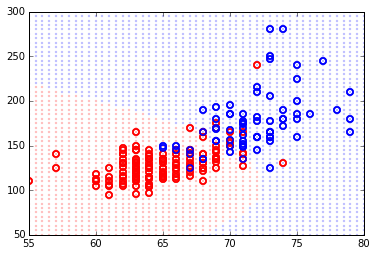

In [66]:
colors = ['r', 'b']

def show_points():
    for c in [0, 1]:
        i = y == c
        color = colors[c]
        plt.plot(X[i, 0], X[i, 1], 'o', markeredgewidth = 1.5, markerfacecolor = 'none', markeredgecolor = color)

show_points()
axis = plt.gca()
minx, maxx = axis.get_xlim()
miny, maxy = axis.get_ylim()
gridx = np.linspace(minx, maxx, 51)
gridy = np.linspace(miny, maxy, 51)
meshx, meshy = np.meshgrid(gridx, gridy)
XX = np.vstack([meshx.flatten(), meshy.flatten()]).T
Z = clf.predict(XX)

for c in [0, 1]:
    i = Z == c
    color = colors[c]
    plt.plot(XX[i, 0], XX[i, 1], 'o', alpha = 0.2, markersize = 2, markerfacecolor = color, markeredgecolor = color)

show_points()

plt.show()